# TENSORFLOW 2.0 ile Transfer Öğrenme ve Fine Tuning

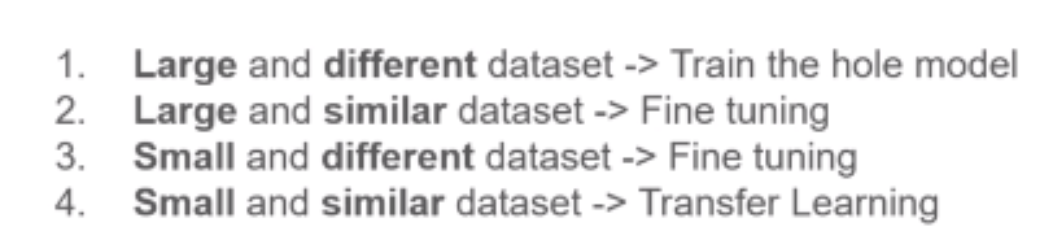

In [40]:
from IPython.display import Image
Image('resim.PNG')

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 70kB/s 
     |████████████████████████████████| 419kB 40.2MB/s 
     |████████████████████████████████| 3.0MB 32.0MB/s 


In [2]:
!pip install tqdm

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./cats_and_dogs_filtered.zip

--2019-07-19 05:24:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  43.8MB/s    in 1.5s    

2019-07-19 05:24:19 (43.8 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

In [0]:
dataset_path = "./cats_and_dogs_filtered.zip"

In [0]:
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")

In [0]:
zip_object.extractall("./")

In [0]:
zip_object.close()

In [0]:
dataset_path_new = "./cats_and_dogs_filtered/"

In [0]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

In [0]:
IMG_SHAPE = (128, 128, 3)

In [12]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

9412608/9406464 [==============================] - 2s 0us/step


In [13]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
base_model.trainable = False

In [15]:
base_model.output

<tf.Tensor 'out_relu/Relu6:0' shape=(None, 4, 4, 1280) dtype=float32>

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [17]:
global_average_layer

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [0]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)

In [0]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

Veri

Resizing images

Big pre-trained architecture support only certain input sizes.
For example: MobileNet (architecture that we use) supports: (96, 96), (128, 128), (160, 160), (192, 192), (224, 224).

In [0]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [23]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), batch_size=128, class_mode="binary")

Found 2000 images belonging to 2 classes.


In [24]:
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), batch_size=128, class_mode="binary")

Found 1000 images belonging to 2 classes.


In [25]:
model.fit_generator(train_generator, epochs=5, validation_data=valid_generator)

Epoch 1/5
16/16 [==============================] - 57s 4s/step - loss: 0.2058 - accuracy: 0.9145 - val_loss: 0.1071 - val_accuracy: 0.9660
Epoch 2/5
16/16 [==============================] - 12s 744ms/step - loss: 0.0244 - accuracy: 0.9985 - val_loss: 0.1139 - val_accuracy: 0.9660
Epoch 3/5
16/16 [==============================] - 12s 749ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9700
Epoch 4/5
16/16 [==============================] - 12s 756ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 0.9630
Epoch 5/5
16/16 [==============================] - 12s 750ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1284 - val_accuracy: 0.9730


In [0]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

In [27]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.9729999899864197


### Fine Tuning

In [0]:
base_model.trainable = True

In [29]:
print("Number of layersin the base model: {}".format(len(base_model.layers)))

Number of layersin the base model: 155


In [0]:
fine_tune_at = 100

In [0]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit_generator(train_generator,  
                    epochs=5, 
                    validation_data=valid_generator)

Epoch 1/5
16/16 [==============================] - 31s 2s/step - loss: 4.8152e-04 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9700
Epoch 2/5
16/16 [==============================] - 9s 573ms/step - loss: 2.5403e-04 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9660
Epoch 3/5
16/16 [==============================] - 9s 554ms/step - loss: 6.2877e-05 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9620
Epoch 4/5
16/16 [==============================] - 9s 559ms/step - loss: 4.4217e-05 - accuracy: 1.0000 - val_loss: 0.1523 - val_accuracy: 0.9630
Epoch 5/5
16/16 [==============================] - 9s 561ms/step - loss: 1.4013e-05 - accuracy: 1.0000 - val_loss: 0.1454 - val_accuracy: 0.9660


In [0]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

In [35]:
print("Validation accuracy after fine tuning: {}".format(valid_accuracy))

Validation accuracy after fine tuning: 0.9660000205039978
